In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [312]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [313]:
pd.set_option('display.max_columns', None)

In [314]:
from sklearn.preprocessing import QuantileTransformer


In [116]:
#!pip install iterative-stratification

In [117]:
train.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0,0,0.260191,0.607898,0.000188,0.010018,0.121705,0.283468,0.716532,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0,0.006793,0.357455,0.563166,0.004260,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0,0,0.290228,0.549788,0.000000,0.021336,0.138647,0.103641,0.896359,0.144638,0.855362,0.066903,0.933097,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0,0.028061,0.698428,0.278006,0.003695,0.015835,0.004036,0.959259,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0,0,0.186435,0.677005,0.000489,0.021315,0.114757,0.165772,0.834228,0.272220,0.727780,0.100009,0.899991,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0,0.002200,0.672452,0.154225,0.002181,0.167494,0.003649,0.826164,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0,0,0.281229,0.593281,0.000579,0.007249,0.117663,0.087768,0.912232,0.127875,0.872125,0.029155,0.970845,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0,0.000174,0.728014,0.263831,0.001806,0.000956,0.005393,0.986151,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0,0,0.196687,0.517578,0.000989,0.005148,0.279598,0.345975,0.654025,0.404507,0.595493,0.133552,0.866448,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0,0.192272,0.753491,0.129654,0.004523,0.106953,0.005380,0.957376,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [315]:
test_id = test['ward'] 

In [316]:
train['ward'] = train['ward'].apply(lambda x: x.split(':')[-1])
test['ward'] = test['ward'].apply(lambda x: x.split(':')[-1])

In [317]:
train['ward'] = train['ward'].apply(lambda x: x.split(' ')[-1]).astype(int)
test['ward'] = test['ward'].apply(lambda x: x.split(' ')[-1]).astype(int)

In [318]:
#train['ward_count'] = train['ward'].map(train['ward'].value_counts().to_dict())
#test['ward_count'] = test['ward'].map(test['ward'].value_counts().to_dict())

In [319]:
train = train.drop(['ward','pw_07', 'pw_08','dw_12','dw_13','lan_13'], axis=1)
test = test.drop(['ward','pw_07', 'pw_08','dw_12','dw_13','lan_13'], axis=1)

In [299]:
train.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,ADM4_PCODE,lat,lon,NL
0,1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0.260191,0.607898,0.000188,0.010018,0.121705,0.283468,0.716532,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0.006793,0.357455,0.563166,0.004260,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,ZA4161001,-29.682270,24.734743,0.292039
1,2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0.290228,0.549788,0.000000,0.021336,0.138647,0.103641,0.896359,0.144638,0.855362,0.066903,0.933097,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0.028061,0.698428,0.278006,0.003695,0.015835,0.004036,0.959259,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,ZA4161002,-29.119311,24.757737,3.207775
2,3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0.186435,0.677005,0.000489,0.021315,0.114757,0.165772,0.834228,0.272220,0.727780,0.100009,0.899991,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0.002200,0.672452,0.154225,0.002181,0.167494,0.003649,0.826164,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,ZA4161003,-29.142276,25.094093,0.000000
3,4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0.281229,0.593281,0.000579,0.007249,0.117663,0.087768,0.912232,0.127875,0.872125,0.029155,0.970845,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0.000174,0.728014,0.263831,0.001806,0.000956,0.005393,0.986151,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,ZA4161004,-29.372052,24.942867,2.038778
4,5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0.196687,0.517578,0.000989,0.005148,0.279598,0.345975,0.654025,0.404507,0.595493,0.133552,0.866448,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0.192272,0.753491,0.129654,0.004523,0.106953,0.005380,0.957376,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,ZA4161005,-29.409381,25.290165,0.000000


In [300]:
train['target'].describe()

count    2822.000000
mean       24.507554
std        10.294387
min         0.000000
25%        16.751556
50%        24.156670
75%        32.226553
max        55.528423
Name: target, dtype: float64

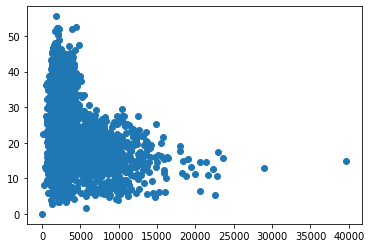

In [125]:
plt.scatter(x='total_households', y='target', data=train)

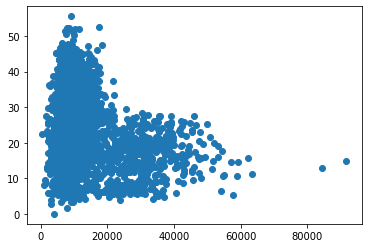

In [73]:
plt.scatter(x='total_individuals', y='target', data=train)

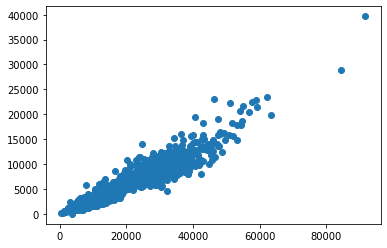

In [74]:
plt.scatter(x='total_individuals', y='total_households', data=train)

In [75]:
# removing outliers
#train = train[train['target'] > 0.0]
#train = train[train['target'] < 55]
#train = train[train['total_individuals'] < 30000]
#train = train[train['total_households'] < 10000]

In [76]:
len(train)

2556

In [77]:
train = train.reset_index(drop=True)

In [78]:
train.columns

Index(['ward', 'total_households', 'total_individuals', 'target', 'dw_00',
       'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08',
       'dw_09', 'dw_10', 'dw_11', 'psa_00', 'psa_01', 'psa_02', 'psa_03',
       'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01', 'lln_00', 'lln_01',
       'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06',
       'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11', 'lan_12', 'lan_14',
       'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04', 'lgt_00', 'pw_00', 'pw_01',
       'pw_02', 'pw_03', 'pw_04', 'pw_05', 'pw_06', 'ADM4_PCODE', 'lat', 'lon',
       'NL'],
      dtype='object')

In [79]:
from tqdm import tqdm

In [170]:
#train['ind/total'] = train['total_individuals'] / train['total_households']
#test['ind/total'] = test['total_individuals'] / test['total_households']

In [171]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor

In [82]:
#train = train.drop('ward',axis=1)
#test= test.drop('ward',axis=1)

In [320]:
train = train.drop('ADM4_PCODE', axis=1)
test = test.drop('ADM4_PCODE', axis=1)

In [321]:
train = train.drop(['total_individuals','total_households'],axis=1)
test= test.drop(['total_individuals','total_households'],axis=1)

In [322]:
train.columns

Index(['target', 'dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06',
       'dw_07', 'dw_08', 'dw_09', 'dw_10', 'dw_11', 'psa_00', 'psa_01',
       'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01',
       'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04',
       'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',
       'lan_12', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04',
       'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05', 'pw_06',
       'lat', 'lon', 'NL'],
      dtype='object')

In [323]:
X = train.drop('target', axis=1)
y = train['target']

In [324]:
from catboost import CatBoostRegressor, CatBoostClassifier

In [325]:
model = CatBoostRegressor(#iterations=600,#learning_rate=0.1,#200 best so far
                          loss_function='RMSE',#bootstrap_type='Bernoulli',
                           #subsample=0.9,#learning_rate=0.03,
                           depth= 5, metric_period=20)#5

In [326]:
from sklearn.model_selection import train_test_split

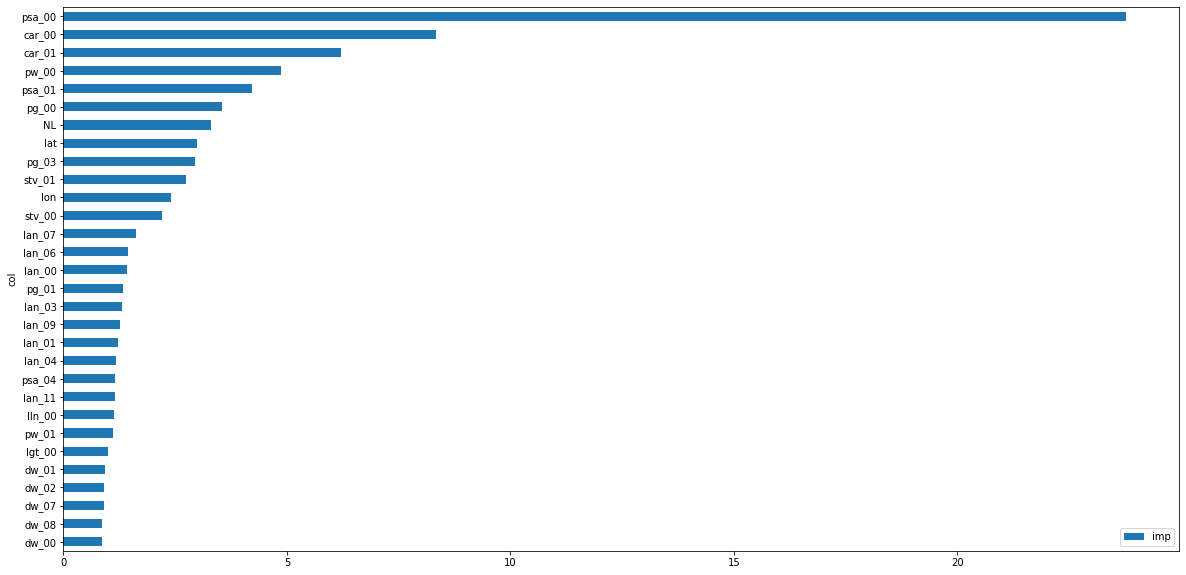

In [291]:
fea_imp = pd.DataFrame({'imp':m.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')

In [332]:
from sklearn.model_selection import train_test_split, KFold

In [333]:
# Split the data into 30% validation and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [337]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score, mean_absolute_error, mean_squared_error
errcb=[]
y_pred_totcb=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit, GroupKFold
fold=KFold(n_splits=5,shuffle=True, random_state=1234)#1234
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index],
    y_train, y_test = y[train_index], y[test_index]
    m=model#LGBMRegressor(**params)
    #LGBMRegressor(**params)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100)
    preds=m.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    errcb.append(np.sqrt(mean_squared_error(y_test,preds)))
    p = m.predict(test)
    y_pred_totcb.append(p)

0:	learn: 10.0567314	test: 10.0567314	test1: 10.1329975	best: 10.1329975 (0)	total: 12.9ms	remaining: 12.8s
20:	learn: 6.9398906	test: 6.9398906	test1: 7.0355313	best: 7.0355313 (20)	total: 103ms	remaining: 4.78s
40:	learn: 5.2676625	test: 5.2676625	test1: 5.4079468	best: 5.4079468 (40)	total: 180ms	remaining: 4.21s
60:	learn: 4.4467092	test: 4.4467092	test1: 4.6150263	best: 4.6150263 (60)	total: 251ms	remaining: 3.86s
80:	learn: 4.0126593	test: 4.0126593	test1: 4.2083402	best: 4.2083402 (80)	total: 326ms	remaining: 3.69s
100:	learn: 3.7796589	test: 3.7796589	test1: 3.9889828	best: 3.9889828 (100)	total: 401ms	remaining: 3.57s
120:	learn: 3.6250056	test: 3.6250056	test1: 3.8408980	best: 3.8408980 (120)	total: 472ms	remaining: 3.43s
140:	learn: 3.5091469	test: 3.5091469	test1: 3.7473513	best: 3.7473513 (140)	total: 547ms	remaining: 3.33s
160:	learn: 3.4223977	test: 3.4223977	test1: 3.6800780	best: 3.6800780 (160)	total: 616ms	remaining: 3.21s
180:	learn: 3.3538932	test: 3.3538932	test1:

0:	learn: 10.0835408	test: 10.0835408	test1: 10.0279686	best: 10.0279686 (0)	total: 4.71ms	remaining: 4.71s
20:	learn: 6.9685323	test: 6.9685323	test1: 6.9121405	best: 6.9121405 (20)	total: 93ms	remaining: 4.33s
40:	learn: 5.3029883	test: 5.3029883	test1: 5.2712056	best: 5.2712056 (40)	total: 178ms	remaining: 4.16s
60:	learn: 4.4716347	test: 4.4716347	test1: 4.4588428	best: 4.4588428 (60)	total: 256ms	remaining: 3.94s
80:	learn: 4.0374137	test: 4.0374137	test1: 4.0693758	best: 4.0693758 (80)	total: 329ms	remaining: 3.73s
100:	learn: 3.7752698	test: 3.7752698	test1: 3.8507621	best: 3.8507621 (100)	total: 400ms	remaining: 3.56s
120:	learn: 3.6098407	test: 3.6098407	test1: 3.7257866	best: 3.7257866 (120)	total: 473ms	remaining: 3.43s
140:	learn: 3.4929756	test: 3.4929756	test1: 3.6486207	best: 3.6486207 (140)	total: 542ms	remaining: 3.3s
160:	learn: 3.4031909	test: 3.4031909	test1: 3.5945485	best: 3.5945485 (160)	total: 608ms	remaining: 3.17s
180:	learn: 3.3361887	test: 3.3361887	test1: 3

0:	learn: 10.2158399	test: 10.2158399	test1: 9.4534418	best: 9.4534418 (0)	total: 7.52ms	remaining: 7.52s
20:	learn: 7.0237020	test: 7.0237020	test1: 6.5484499	best: 6.5484499 (20)	total: 92.8ms	remaining: 4.33s
40:	learn: 5.3263763	test: 5.3263763	test1: 5.0920693	best: 5.0920693 (40)	total: 171ms	remaining: 4.01s
60:	learn: 4.4736839	test: 4.4736839	test1: 4.4302856	best: 4.4302856 (60)	total: 244ms	remaining: 3.75s
80:	learn: 4.0413530	test: 4.0413530	test1: 4.1366546	best: 4.1366546 (80)	total: 311ms	remaining: 3.53s
100:	learn: 3.7814310	test: 3.7814310	test1: 3.9732563	best: 3.9732563 (100)	total: 380ms	remaining: 3.38s
120:	learn: 3.6161819	test: 3.6161819	test1: 3.8771469	best: 3.8771469 (120)	total: 452ms	remaining: 3.29s
140:	learn: 3.5014201	test: 3.5014201	test1: 3.8147775	best: 3.8147775 (140)	total: 523ms	remaining: 3.18s
160:	learn: 3.4177164	test: 3.4177164	test1: 3.7777706	best: 3.7777706 (160)	total: 610ms	remaining: 3.18s
180:	learn: 3.3501659	test: 3.3501659	test1: 

0:	learn: 9.9670167	test: 9.9670167	test1: 10.5189286	best: 10.5189286 (0)	total: 20.4ms	remaining: 20.4s
20:	learn: 6.8834858	test: 6.8834858	test1: 7.3763502	best: 7.3763502 (20)	total: 113ms	remaining: 5.26s
40:	learn: 5.2595951	test: 5.2595951	test1: 5.6982687	best: 5.6982687 (40)	total: 191ms	remaining: 4.47s
60:	learn: 4.4274949	test: 4.4274949	test1: 4.8218323	best: 4.8218323 (60)	total: 268ms	remaining: 4.13s
80:	learn: 4.0045593	test: 4.0045593	test1: 4.3662979	best: 4.3662979 (80)	total: 349ms	remaining: 3.96s
100:	learn: 3.7516098	test: 3.7516098	test1: 4.1078285	best: 4.1078285 (100)	total: 426ms	remaining: 3.79s
120:	learn: 3.5852794	test: 3.5852794	test1: 3.9535713	best: 3.9535713 (120)	total: 541ms	remaining: 3.93s
140:	learn: 3.4743271	test: 3.4743271	test1: 3.8614270	best: 3.8614270 (140)	total: 612ms	remaining: 3.73s
160:	learn: 3.3866225	test: 3.3866225	test1: 3.7917669	best: 3.7917669 (160)	total: 679ms	remaining: 3.54s
180:	learn: 3.3210133	test: 3.3210133	test1: 3

0:	learn: 10.0399474	test: 10.0399474	test1: 10.2173275	best: 10.2173275 (0)	total: 16.8ms	remaining: 16.8s
20:	learn: 6.9285151	test: 6.9285151	test1: 7.0530567	best: 7.0530567 (20)	total: 97.2ms	remaining: 4.53s
40:	learn: 5.2819183	test: 5.2819183	test1: 5.3879347	best: 5.3879347 (40)	total: 185ms	remaining: 4.32s
60:	learn: 4.4430356	test: 4.4430356	test1: 4.5779714	best: 4.5779714 (60)	total: 266ms	remaining: 4.09s
80:	learn: 4.0083175	test: 4.0083175	test1: 4.1793535	best: 4.1793535 (80)	total: 337ms	remaining: 3.83s
100:	learn: 3.7626054	test: 3.7626054	test1: 3.9860645	best: 3.9860645 (100)	total: 408ms	remaining: 3.63s
120:	learn: 3.5982795	test: 3.5982795	test1: 3.8686525	best: 3.8686525 (120)	total: 475ms	remaining: 3.45s
140:	learn: 3.4831509	test: 3.4831509	test1: 3.7970800	best: 3.7970800 (140)	total: 551ms	remaining: 3.36s
160:	learn: 3.3978511	test: 3.3978511	test1: 3.7431216	best: 3.7431216 (160)	total: 644ms	remaining: 3.36s
180:	learn: 3.3290306	test: 3.3290306	test1

In [338]:
np.mean(errcb)

3.2396746582912366

In [339]:
d = {"ward": a['ward'], 'target':np.mean(y_pred_totcb,0)}#np.mean(y_pred_totcb,0)
test_predictions = pd.DataFrame(data=d)
test_predictions = test_predictions[["ward", 'target']]

In [340]:
test_predictions.head()

,ward,target
0,21001001: Ward 1,18.066404
1,21001002: Ward 2,13.453186
2,21001003: Ward 3,21.178965
3,21001004: Ward 4,17.161581
4,21001005: Ward 5,20.532444


In [341]:
test_predictions.to_csv('wip58.csv', index=False)